#this is the head


[*********************100%***********************]  1 of 1 completed



SPY Analysis Summary (Last 20 Years)
----------------------------------------
Total Trading Days: 5028
Positive Days: 2770
Negative Days: 2243
Neutral Days: 15
Positive Days %: 55.09%
Negative Days %: 44.61%
Neutral Days %: 0.30%
Avg Positive Return %: 0.74%
Avg Negative Return %: -0.82%


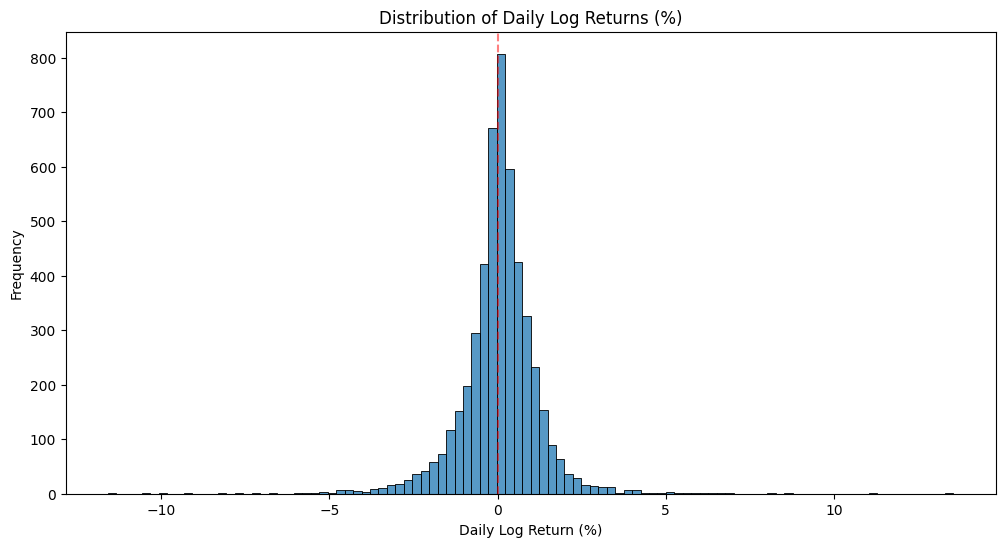

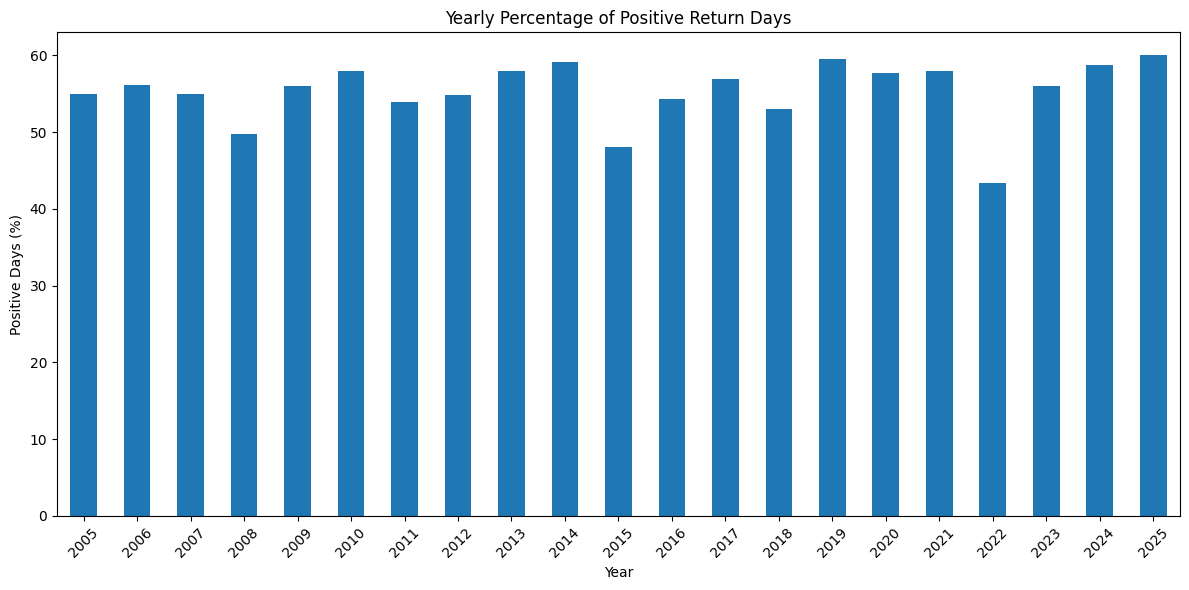

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Calculate date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365*20)

# Download SPY data
spy = yf.download('SPY', start=start_date, end=end_date)

# Calculate log returns using Close price instead of Adj Close
spy['ln_return'] = np.log(spy['Close'] / spy['Close'].shift(1))

# Remove first row with NaN
spy = spy.dropna()

# Calculate basic statistics
total_days = len(spy)
positive_days = len(spy[spy['ln_return'] > 0])
negative_days = len(spy[spy['ln_return'] < 0])
neutral_days = len(spy[spy['ln_return'] == 0])

# Calculate percentages
positive_pct = (positive_days / total_days) * 100
negative_pct = (negative_days / total_days) * 100
neutral_pct = (neutral_days / total_days) * 100

# Calculate average returns
avg_positive_return = spy[spy['ln_return'] > 0]['ln_return'].mean() * 100
avg_negative_return = spy[spy['ln_return'] < 0]['ln_return'].mean() * 100

# Create a summary dictionary
summary = {
    'Total Trading Days': total_days,
    'Positive Days': positive_days,
    'Negative Days': negative_days,
    'Neutral Days': neutral_days,
    'Positive Days %': f"{positive_pct:.2f}%",
    'Negative Days %': f"{negative_pct:.2f}%",
    'Neutral Days %': f"{neutral_pct:.2f}%",
    'Avg Positive Return %': f"{avg_positive_return:.2f}%",
    'Avg Negative Return %': f"{avg_negative_return:.2f}%"
}

# Print summary
print("\nSPY Analysis Summary (Last 20 Years)")
print("-" * 40)
for key, value in summary.items():
    print(f"{key}: {value}")

# Create visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=spy['ln_return'] * 100, bins=100)
plt.title('Distribution of Daily Log Returns (%)')
plt.xlabel('Daily Log Return (%)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.show()

# Calculate yearly statistics
spy['Year'] = spy.index.year
yearly_stats = spy.groupby('Year')['ln_return'].agg([
    ('Positive Days', lambda x: (x > 0).sum()),
    ('Total Days', 'count')
])
yearly_stats['Positive %'] = (yearly_stats['Positive Days'] / yearly_stats['Total Days'] * 100)

# Plot yearly positive day percentages
plt.figure(figsize=(12, 6))
yearly_stats['Positive %'].plot(kind='bar')
plt.title('Yearly Percentage of Positive Return Days')
plt.xlabel('Year')
plt.ylabel('Positive Days (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to calculate statistics for a given ticker
def calculate_statistics(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        return None
    data['ln_return'] = np.log(data['Close'] / data['Close'].shift(1))
    data = data.dropna()

    total_days = len(data)
    positive_days = len(data[data['ln_return'] > 0])
    avg_positive_return = data[data['ln_return'] > 0]['ln_return'].mean() * 100

    positive_pct = (positive_days / total_days) * 100

    return {
        'Ticker': ticker,
        'Total Trading Days': total_days,
        'Positive Days': positive_days,
        'Positive Days %': positive_pct,
        'Avg Positive Return %': avg_positive_return
    }

# Calculate date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365*20)

# List of tickers
tickers = ['AAPL', 'NFLX', 'NVDA', 'TSLA', 'F', 'GOOGL', 'AMZN']

# Calculate statistics for each ticker
statistics = []
for ticker in tickers:
    stats = calculate_statistics(ticker, start_date, end_date)
    if stats:
        statistics.append(stats)

# Convert to DataFrame
df_stats = pd.DataFrame(statistics)

# Sort by Avg Positive Return % and Positive Days %
df_sorted_avg_return = df_stats.sort_values(by='Avg Positive Return %', ascending=False).head(10)
df_sorted_positive_days_pct = df_stats.sort_values(by='Positive Days %', ascending=False).head(10)

# Print top 10 companies by Avg Positive Return %
print("Top 10 Companies by Avg Positive Return %")
print(df_sorted_avg_return[['Ticker', 'Avg Positive Return %']])

# Print top 10 companies by Positive Days %
print("\nTop 10 Companies by Positive Days %")
print(df_sorted_positive_days_pct[['Ticker', 'Positive Days %']])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Top 10 Companies by Avg Positive Return %
  Ticker  Avg Positive Return %
3   TSLA               2.566786
2   NVDA               2.173473
1   NFLX               2.147442
4      F               1.750986
6   AMZN               1.621137
0   AAPL               1.436941
5  GOOGL               1.286673

Top 10 Companies by Positive Days %
  Ticker  Positive Days %
0   AAPL        52.934156
5  GOOGL        52.556197
2   NVDA        52.337378
6   AMZN        51.720708
3   TSLA        51.617287
1   NFLX        51.004575
4      F        49.094888


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Top 10 Companies by Avg Positive Return %
  Ticker  Avg Positive Return %
3   TSLA               2.566786
2   NVDA               2.173473
1   NFLX               2.147442
4      F               1.750986
6   AMZN               1.621137
0   AAPL               1.436941
5  GOOGL               1.286673

Top 10 Companies by Positive Days %
  Ticker  Positive Days %
0   AAPL        52.934156
5  GOOGL        52.556197
2   NVDA        52.337378
6   AMZN        51.720708
3   TSLA        51.617287
1   NFLX        51.004575
4      F        49.094888


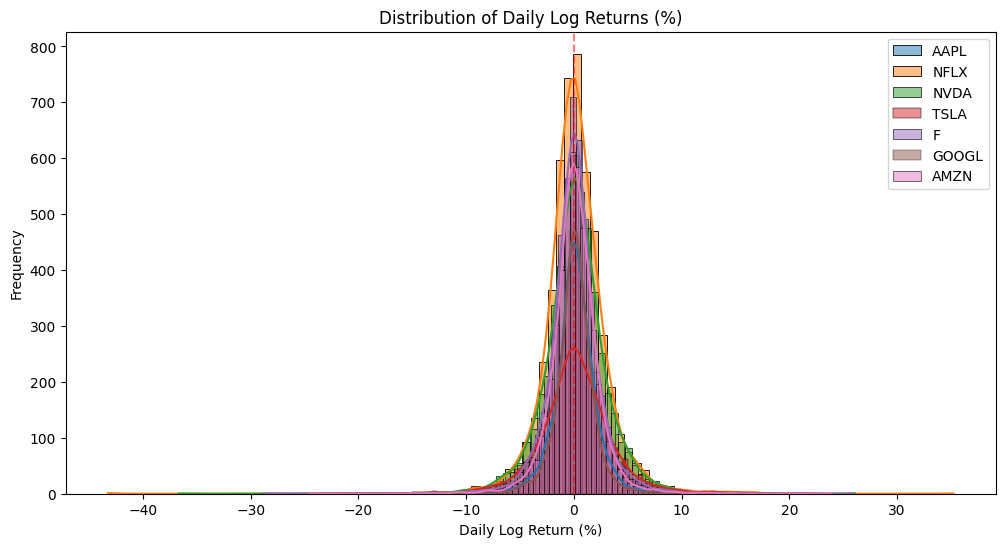

In [ ]:
   import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to calculate statistics for a given ticker
def calculate_statistics(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        return None
    data['ln_return'] = np.log(data['Close'] / data['Close'].shift(1))
    data = data.dropna()

    total_days = len(data)
    positive_days = len(data[data['ln_return'] > 0])
    avg_positive_return = data[data['ln_return'] > 0]['ln_return'].mean() * 100

    positive_pct = (positive_days / total_days) * 100

    return {
        'Ticker': ticker,
        'Total Trading Days': total_days,
        'Positive Days': positive_days,
        'Positive Days %': positive_pct,
        'Avg Positive Return %': avg_positive_return,
        'ln_return': data['ln_return']
    }

# Calculate date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365*20)

# List of tickers
tickers = ['AAPL', 'NFLX', 'NVDA', 'TSLA', 'F', 'GOOGL', 'AMZN']

# Calculate statistics for each ticker
statistics = []
ln_returns = {}
for ticker in tickers:
    stats = calculate_statistics(ticker, start_date, end_date)
    if stats:
        statistics.append(stats)
        ln_returns[ticker] = stats['ln_return']

# Convert to DataFrame
df_stats = pd.DataFrame(statistics)

# Sort by Avg Positive Return % and Positive Days %
df_sorted_avg_return = df_stats.sort_values(by='Avg Positive Return %', ascending=False).head(10)
df_sorted_positive_days_pct = df_stats.sort_values(by='Positive Days %', ascending=False).head(10)

# Print top 10 companies by Avg Positive Return %
print("Top 10 Companies by Avg Positive Return %")
print(df_sorted_avg_return[['Ticker', 'Avg Positive Return %']])

# Print top 10 companies by Positive Days %
print("\nTop 10 Companies by Positive Days %")
print(df_sorted_positive_days_pct[['Ticker', 'Positive Days %']])

# Plot ln returns for each ticker
plt.figure(figsize=(12, 6))
for ticker in ln_returns:
    sns.histplot(ln_returns[ticker] * 100, bins=100, label=ticker, kde=True)

plt.title('Distribution of Daily Log Returns (%)')
plt.xlabel('Daily Log Return (%)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

<ipython-input-3-1ec179b4ab50>:17: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for row in table.findAll('tr')[1:]:
<ipython-input-3-1ec179b4ab50>:18: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  ticker = row.findAll('td')[0].text.strip()
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker: ALGN, p-value: [0.], Standard Deviation of Ln Returns: Ticker
ALGN    0.036282
dtype: float64


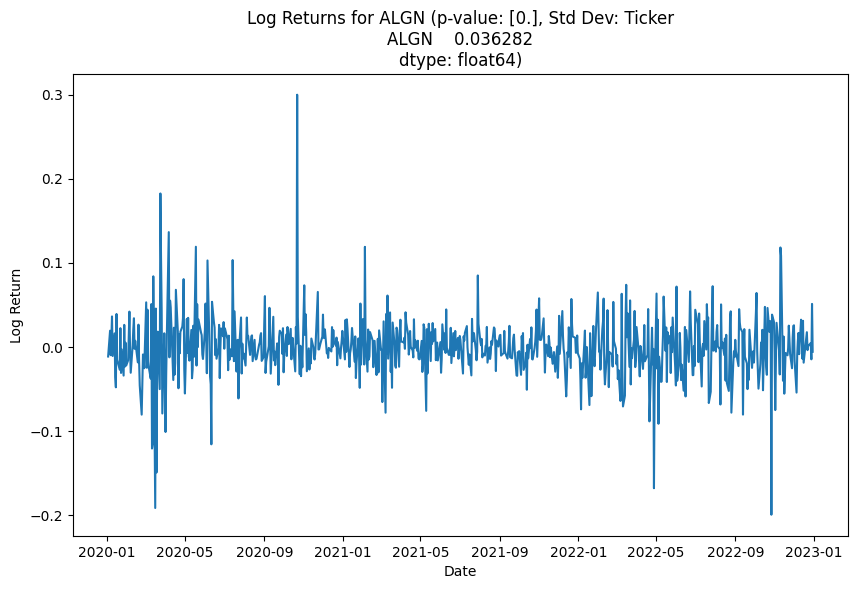

Ticker: ANET, p-value: [0.], Standard Deviation of Ln Returns: Ticker
ANET    0.026458
dtype: float64


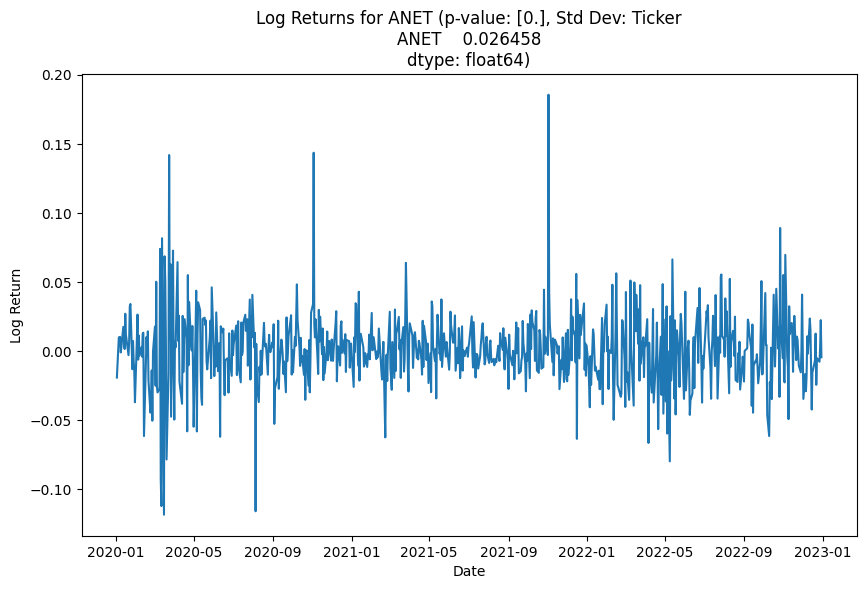

Ticker: CEG, p-value: [0.], Standard Deviation of Ln Returns: Ticker
CEG    0.029561
dtype: float64


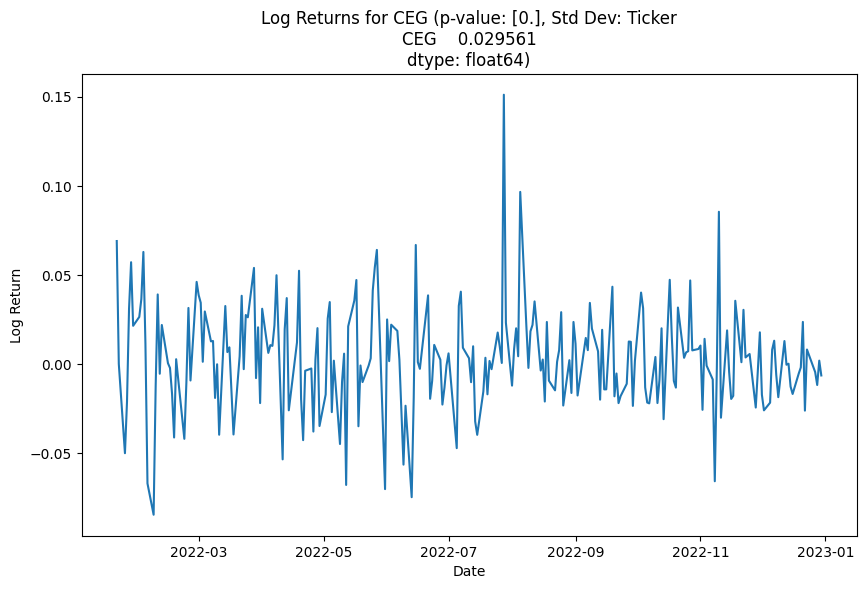

Ticker: COST, p-value: [0.], Standard Deviation of Ln Returns: Ticker
COST    0.017067
dtype: float64


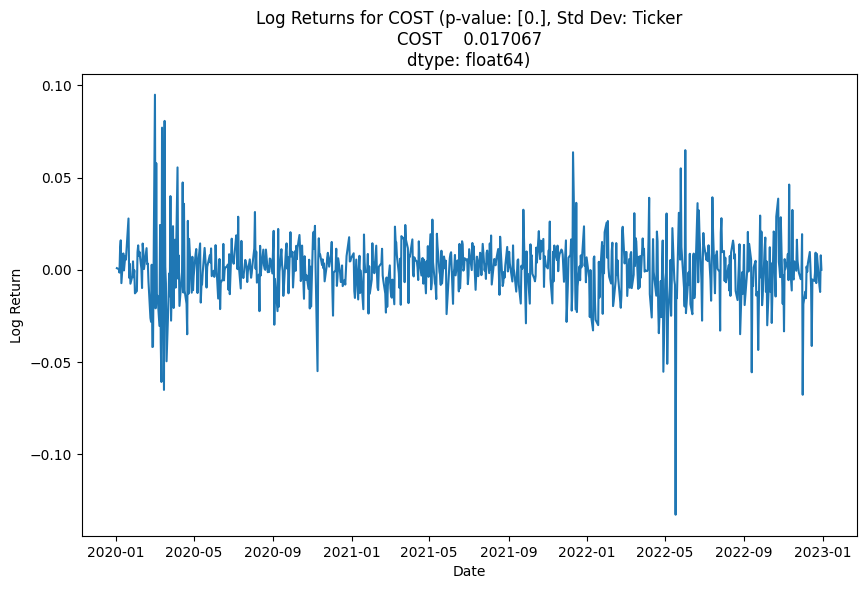

Ticker: CVS, p-value: [0.], Standard Deviation of Ln Returns: Ticker
CVS    0.019029
dtype: float64


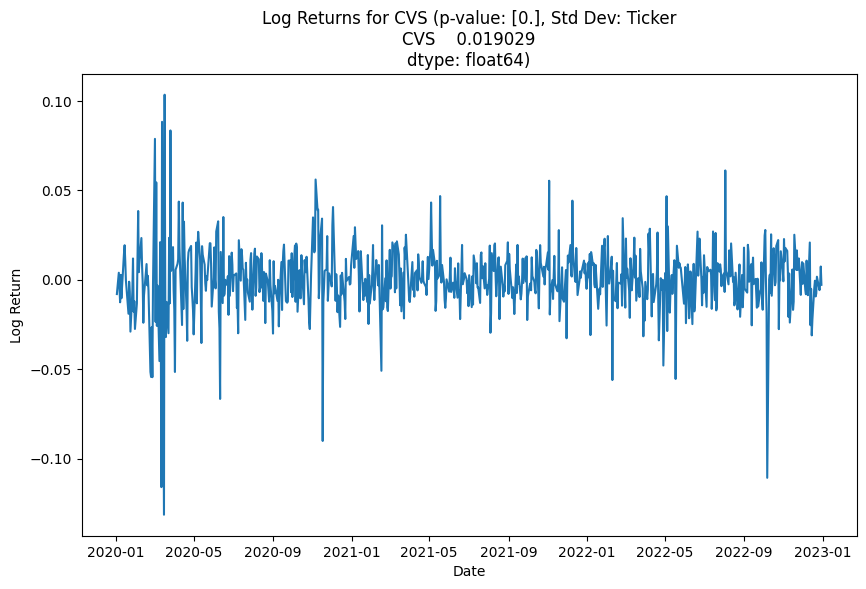

Ticker: ELV, p-value: [0.], Standard Deviation of Ln Returns: Ticker
ELV    0.024046
dtype: float64


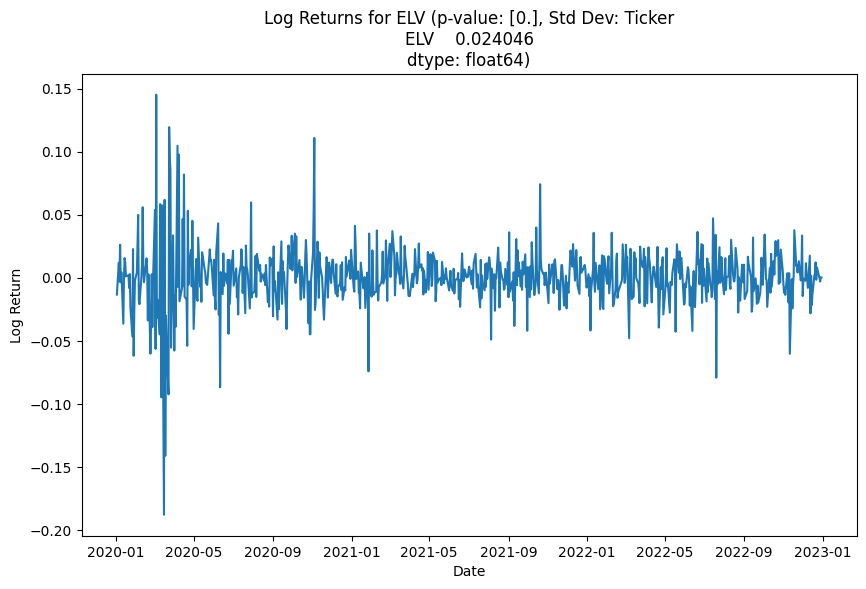

Ticker: EXR, p-value: [0.], Standard Deviation of Ln Returns: Ticker
EXR    0.021079
dtype: float64


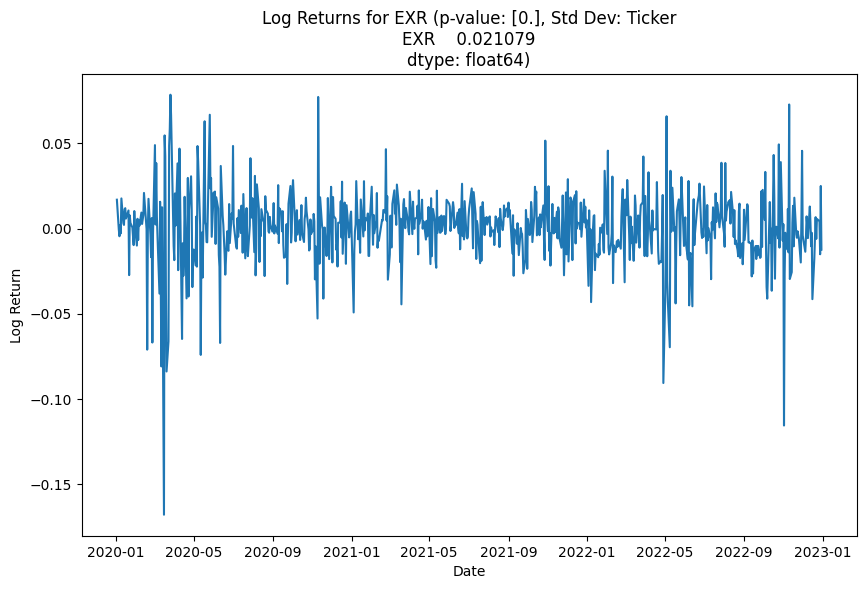

Ticker: FTNT, p-value: [0.], Standard Deviation of Ln Returns: Ticker
FTNT    0.031053
dtype: float64


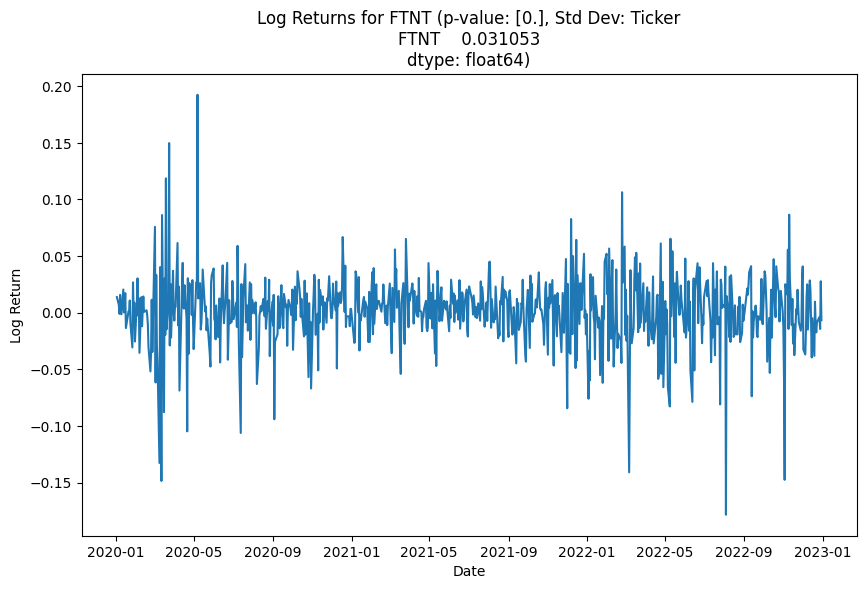

Ticker: IT, p-value: [0.], Standard Deviation of Ln Returns: Ticker
IT    0.024707
dtype: float64


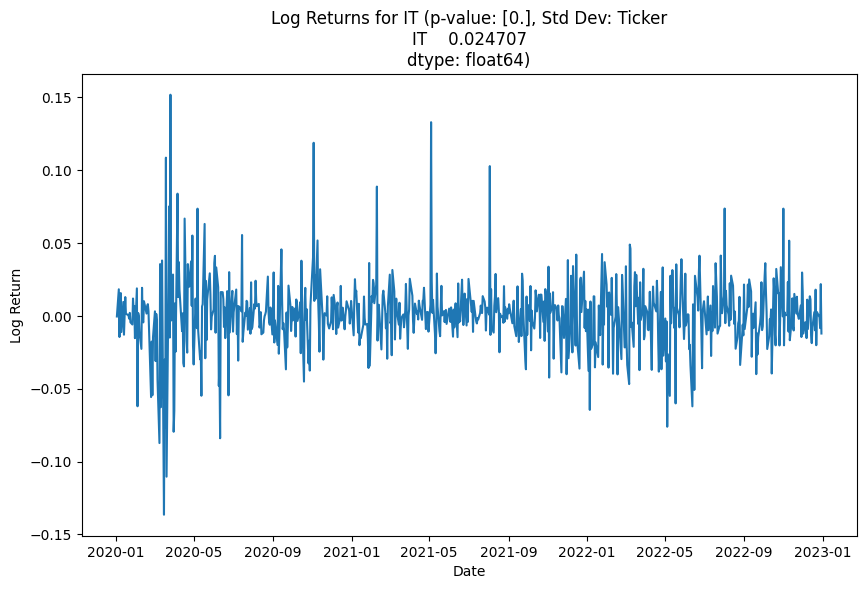

Ticker: IRM, p-value: [0.], Standard Deviation of Ln Returns: Ticker
IRM    0.023472
dtype: float64


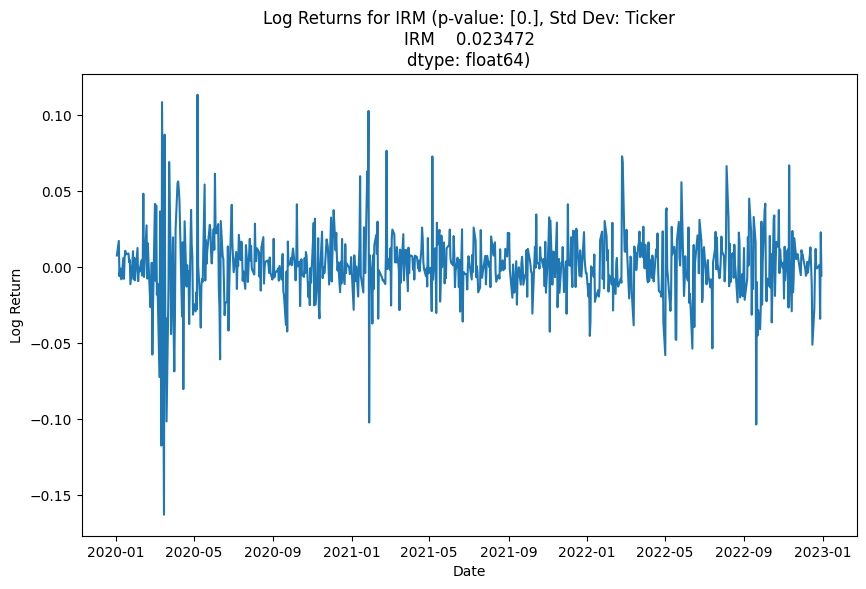

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Get the list of S&P 500 companies from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'id': 'constituents'})

# Parse the table to get the list of tickers
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip()
    tickers.append(ticker)

# Function to check if data is normally distributed and return the p-value
def normality_test(data):
    k2, p = stats.normaltest(data)
    return p

# Get historical data for each ticker and check for normal distribution
non_normal_tickers = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
        if not data.empty:
            close_prices = data['Close']
            p_value = normality_test(close_prices)
            non_normal_tickers.append((ticker, close_prices, p_value))
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

# Sort the tickers by the p-value (ascending)
non_normal_tickers.sort(key=lambda x: x[2])

# Get the top 10 tickers that are most non-normally distributed
top_10_non_normal_tickers = non_normal_tickers[:10]

# Display the names and ln returns of the top 10 tickers along with their standard deviation
for ticker, prices, p_value in top_10_non_normal_tickers:
    ln_returns = np.log(prices / prices.shift(1)).dropna()
    std_dev = ln_returns.std()
    print(f"Ticker: {ticker}, p-value: {p_value}, Standard Deviation of Ln Returns: {std_dev}")
    plt.figure(figsize=(10, 6))
    plt.plot(ln_returns)
    plt.title(f'Log Returns for {ticker} (p-value: {p_value}, Std Dev: {std_dev})')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.show()

<ipython-input-6-aa913a7c16c2>:17: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for row in table.findAll('tr')[1:]:
<ipython-input-6-aa913a7c16c2>:18: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  ticker = row.findAll('td')[0].text.strip()
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker: IBM, p-value: [7.92937648e-21], Standard Deviation of Ln Returns: Ticker
IBM    0.023955
dtype: float64
Ticker: SBUX, p-value: [2.52719216e-14], Standard Deviation of Ln Returns: Ticker
SBUX    0.016034
dtype: float64
Ticker: FFIV, p-value: [4.91089741e-14], Standard Deviation of Ln Returns: Ticker
FFIV    0.023076
dtype: float64
Ticker: ROP, p-value: [7.38538115e-09], Standard Deviation of Ln Returns: Ticker
ROP    0.013328
dtype: float64
Ticker: KR, p-value: [7.95836421e-09], Standard Deviation of Ln Returns: Ticker
KR    0.011983
dtype: float64
Ticker: RCL, p-value: [8.57617527e-09], Standard Deviation of Ln Returns: Ticker
RCL    0.029813
dtype: float64
Ticker: ACN, p-value: [1.22688635e-08], Standard Deviation of Ln Returns: Ticker
ACN    0.015347
dtype: float64
Ticker: PYPL, p-value: [3.22736157e-08], Standard Deviation of Ln Returns: Ticker
PYPL    0.03133
dtype: float64
Ticker: HAS, p-value: [6.29461369e-08], Standard Deviation of Ln Returns: Ticker
HAS    0.024772
dtyp

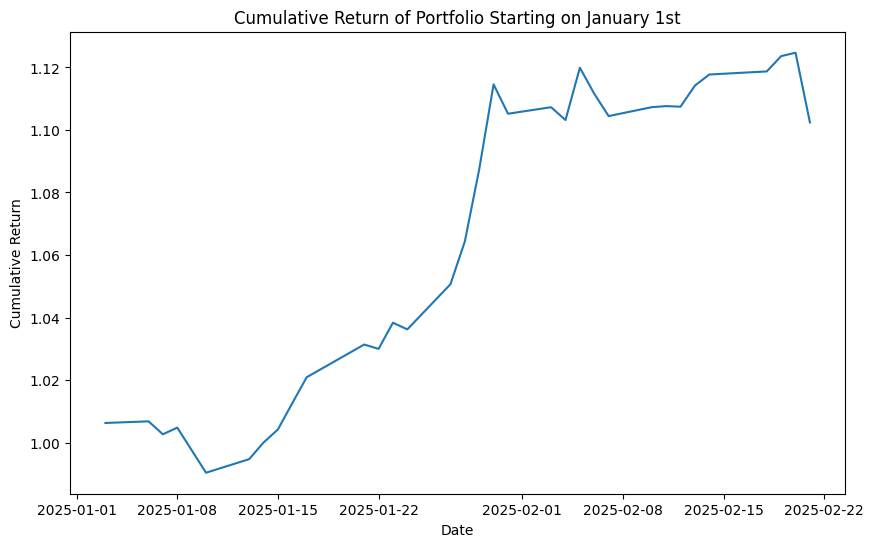

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Get the list of S&P 500 companies from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'id': 'constituents'})

# Parse the table to get the list of tickers
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip()
    tickers.append(ticker)

# Function to check if data is normally distributed and return the p-value
def normality_test(data):
    k2, p = stats.normaltest(data)
    return p

# Get historical data for each ticker and check for normal distribution
non_normal_tickers = []
for ticker in tickers:
    try:
        data = yf.download(ticker, start="2025-01-01", end="2025-02-24")
        if not data.empty:
            close_prices = data['Close']
            p_value = normality_test(close_prices)
            non_normal_tickers.append((ticker, close_prices, p_value))
    except Exception as e:
        print(f"Could not retrieve data for {ticker}: {e}")

# Sort the tickers by the p-value (ascending)
non_normal_tickers.sort(key=lambda x: x[2])

# Get the top 10 tickers that are most non-normally distributed
top_10_non_normal_tickers = non_normal_tickers[:10]

# Display the names and ln returns of the top 10 tickers along with their standard deviation
portfolio_returns = pd.DataFrame()
for ticker, prices, p_value in top_10_non_normal_tickers:
    ln_returns = np.log(prices / prices.shift(1)).dropna()
    std_dev = ln_returns.std()
    print(f"Ticker: {ticker}, p-value: {p_value}, Standard Deviation of Ln Returns: {std_dev}")
    portfolio_returns[ticker] = ln_returns

# Calculate the combined return of the portfolio starting on January 1st
portfolio_returns['Combined'] = portfolio_returns.mean(axis=1)
cumulative_return = (portfolio_returns['Combined'] + 1).cumprod()

# Plot the cumulative return of the portfolio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_return)
plt.title('Cumulative Return of Portfolio Starting on January 1st')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

<ipython-input-8-658bb06418f2>:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp500_df = pd.read_html(str(table))[0]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 comple

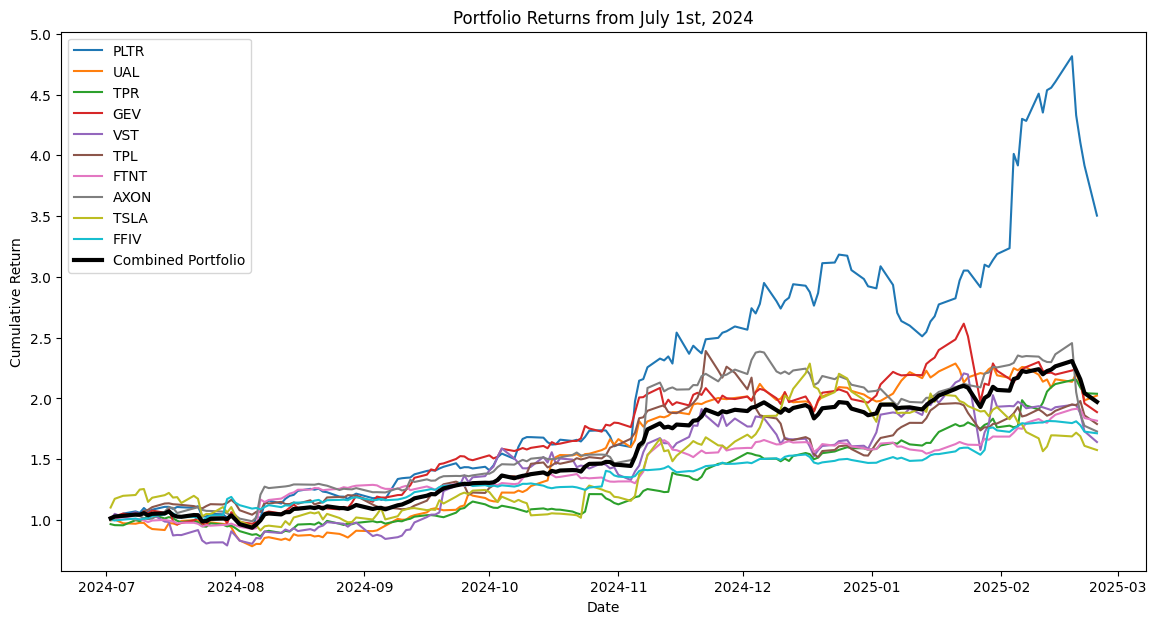

Portfolio:
    Symbol  Weight
361   PLTR     0.1
461    UAL     0.1
435    TPR     0.1
210    GEV     0.1
476    VST     0.1
444    TPL     0.1
200   FTNT     0.1
54    AXON     0.1
442   TSLA     0.1
187   FFIV     0.1


In [8]:
# Install necessary libraries
!pip install yfinance pandas numpy matplotlib

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Step 1: Get the list of S&P 500 companies from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'id': 'constituents'})
sp500_df = pd.read_html(str(table))[0]

# Step 2: Fetch historical data from Yahoo Finance
def get_historical_data(ticker):
    data = yf.download(ticker, start="2024-07-01", end="2025-02-25")
    if 'Adj Close' not in data.columns:
        data['Adj Close'] = data['Close']
    return data

sp500_df['Historical Data'] = sp500_df['Symbol'].apply(get_historical_data)

# Step 3: Perform financial analysis
# For simplicity, let's use the average return as a criterion
def calculate_average_return(data):
    data['Return'] = data['Adj Close'].pct_change()
    return data['Return'].mean()

sp500_df['Average Return'] = sp500_df['Historical Data'].apply(calculate_average_return)

# Step 4: Build a portfolio of 10 stocks with the highest average return
top_10_stocks = sp500_df.nlargest(10, 'Average Return')
portfolio = top_10_stocks[['Symbol', 'Average Return']]

# Step 5: Allocate equal weights to each stock in the portfolio
portfolio['Weight'] = 1 / len(portfolio)

# Step 6: Visualize the returns
plt.figure(figsize=(14, 7))

for symbol in portfolio['Symbol']:
    data = top_10_stocks[top_10_stocks['Symbol'] == symbol]['Historical Data'].values[0]
    data['Cumulative Return'] = (1 + data['Return']).cumprod()
    plt.plot(data.index, data['Cumulative Return'], label=symbol)

# Combined portfolio return
combined_return = np.zeros(len(data))
for symbol in portfolio['Symbol']:
    data = top_10_stocks[top_10_stocks['Symbol'] == symbol]['Historical Data'].values[0]
    combined_return += data['Cumulative Return'] * portfolio[portfolio['Symbol'] == symbol]['Weight'].values[0]

plt.plot(data.index, combined_return, label='Combined Portfolio', linewidth=3, color='black')

plt.title('Portfolio Returns from July 1st, 2024')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Display the portfolio
print("Portfolio:")
print(portfolio[['Symbol', 'Weight']])